---
title: 2020 reading list
summary: Taking a look back at the books I read in 2020 to learn more about my reading habits
authors:
- admin
tags: 
- Books
- Python
categories: []
date: "2020-01-09T00:00:00Z"
featured: false
draft: false
math: true

links:
url_pdf: ''
url_code: ''
url_dataset: ''
url_poster: ''
url_project: ''
url_slides: ''
url_source: ''
url_video: ''

# Featured image
# To use, add an image named `featured.jpg/png` to your page's folder. 
image:
  caption: ""
  focal_point: ""

# Projects (optional).
#   Associate this post with one or more of your projects.
#   Simply enter your project's folder or file name without extension.
#   E.g. `projects = ["internal-project"]` references 
#   `content/project/deep-learning/index.md`.
#   Otherwise, set `projects = []`.
projects: []
---

I read some 70 books in 2020. That got me thinking, maybe I could turn that list of books into a simple data set and explore some **Python** packages to analyze and learn more about my reading habits. 

I turn to books for a few different reasons: for comfort, emotional catharsis, and to learn new things. Over the course of 2020, reading books was a reliable way to distract myself while expanding my horizons.

# Load data

This part is an excuse for me to get a quick introduction to **pandas** and how it handles tabular data as a dataframe. 

In [1]:
import pandas as pd

Now I can load the data from a csv file and take a look at the first entries. 

In [2]:
books = pd.read_csv("2020 book table.csv")
books.head(10)

,Count,Title,Author,Year,Note,Number of pages,Reading time (if known),Reread?
0,1,Words and Rules,Steven Pinker,1999,nonfiction,348,NaN,0
1,2,The Wonderful Wizard of Oz,L. Frank Baum,1900,fiction; children’s; classics,224,NaN,0
2,3,Little Women,Louisa May Alcott,1868,fiction; classics,504,NaN,1
3,4,Unnatural Death,Dorothy L. Sayers,1927,fiction; mystery,240,NaN,0
4,5,Seeing Voices,Oliver Sacks,1989,nonfiction,186,NaN,0
5,6,The Paper Garden,Molly Peacock,2010,nonfiction; biography,416,NaN,0
6,7,Bad Heir Day,Wendy Holden,2008,fiction,339,NaN,1
7,8,Frankenstein,Mary Shelley,1818,fiction; classics; horror,177,NaN,0
8,9,The Franchise Affair,Josephine Tey,1948,fiction; mystery,272,NaN,1
9,10,A Room with a View,E. M. Forster,1908,fiction,172,NaN,0


For the columns containing all numeric entries, a quick way to get a sense of the distribution is using **.describe()**.

Here I can see counts, means, standard deviations, extrema and quartiles by column.

In [3]:
books.describe()

,Count,Year,Number of pages,Reread?
count,70.000000,70.000000,70.000000,70.000000
mean,35.500000,1990.442857,298.471429,0.200000
std,20.351085,38.526722,113.548524,0.402888
min,1.000000,1818.000000,87.000000,0.000000
25%,18.250000,1982.500000,208.500000,0.000000
50%,35.500000,2006.000000,291.000000,0.000000
75%,52.750000,2015.000000,352.000000,0.000000
max,70.000000,2020.000000,692.000000,1.000000


Time to dive a little deeper!

# Publication dates

I want an overview of the publication dates for the books to see the breadth of time that I covered.

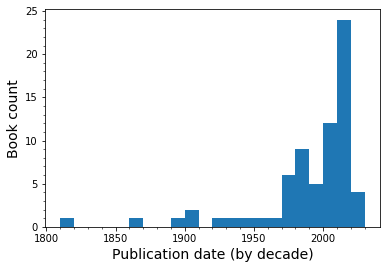

In [4]:
import matplotlib.pyplot as plt

# set bins by decade from leftmost to rightmost edge
bins = range((books['Year'].min()//10)*10, (books['Year'].max()//10+2)*10, 10)

ax = books['Year'].plot.hist(bins=bins, grid=False)
ax.set_xticks(bins, minor=True)
ax.set_yticks(range(25), minor=True)
ax.set_xlabel("Publication date (by decade)", size=14)
ax.set_ylabel("Book count", size=14)
plt.show()

Since the **matplotlib** settings for plots are built into **pandas**, it took me a minute to realize that I still had to use the **.show()** command to format the output nicely.

I managed to read at least one book for almost every decade since the 1890s, with a far greater proportion skewing toward the last 20 years or so.
Some of the data points aren't strictly accurate though - I read two books of George MacDonald stories that were written in the 19th century but took the publication date of the collection (1970s). 

# Reread vs. first encounter 

I tend to read books many times. Books that I grew up reading are comforting and feel like old friends. Since I also read quite quickly, I sometimes skim and miss details on a first pass that can make a second reading more worthwhile.

In [5]:
books['Reread?'].astype('bool').value_counts()

False    56
True     14
Name: Reread?, dtype: int64

I used 1/0 as True/False for an identifier in this column when entering new books, this way I can see that 14 of them were rereads.

# Reading time

Partway through the year, I switched to reading mainly ebooks on my phone through Overdrive, which I have access to through the public library system. This allows me to track an additional metric: reading time. 

I haven't looked into how this is tracked, I suspect that my phone screen has to be on, displaying the ebook. If I get distracted or set my phone down, the app overrides my normal short screen timeout and will stay on for a few minutes (during which I may not be reading). I still suspect that it is a pretty accurate assessment, much more so than if I tried to keep a tally myself.

I want to know how closely correlated this is with page count. First, I need to convert the time string to a number of minutes. I kept track of the time in a "H:MM" format matching the information I get when I finish an ebook.

In [6]:
def timetominutes(t):
  h, m = t.split(':')
  return int(h) * 60 + int(m) 
books['Reading time (if known)'] = books[books['Reading time (if known)'].notna()]['Reading time (if known)'].apply(timetominutes)
books.tail(5)

,Count,Title,Author,Year,Note,Number of pages,Reading time (if known),Reread?
65,66,The Book Thief,Markus Zusak,2005,fiction; historical fiction; young adult,584,390.0,0
66,67,The Bookish Life of Nina Hill,Abbi Waxman,2019,fiction,352,267.0,0
67,68,P.S. I Still Love You,Jenny Han,2015,fiction; young adult; romance,337,226.0,0
68,69,A Brief History of Time,Stephen W. Hawking,1988,nonfiction,198,NaN,0
69,70,Breakfast at Tiffany's,Truman Capote,1958,fiction; novella; short story,179,177.0,0


Now I can plot reading time as a function of the number of pages. 

I found page counts through a variety of sources (openlibrary.org, Goodreads, Amazon paperback listings, checking books on my shelf). For books where I found multiple sources, I just picked one. This is a fun exercise, only approximate accuracy is required.

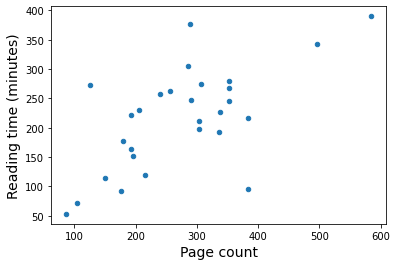

In [7]:
ax = books.plot('Number of pages', 'Reading time (if known)', kind='scatter')
ax.set_xlabel("Page count", size=14)
ax.set_ylabel("Reading time (minutes)", size=14)
plt.show()

There's definitely some degree of correlation between these properties. I want to try to get a linear fit so I can estimate a total book reading time for 2020. I know for a fact that one of the outliers was a Henry James novella called *The Turn of the Screw*. It was a challenging read. On the opposite end of the spectrum, there was a young adult book called *Spoiled* that was simpler than my usual choices.
Since there are outliers on either side, I'm going keep all the data points and see what I end up with.

I'll consider only ebooks for this. Because the only missing elements in the dataset are the reading times for physical books, I can use the handy **.dropna()** to separate the ebook subset of my list that has no missing values.

In [8]:
ebooks = books.dropna()

I'm using a linear fit with forced intercept so that 0 pages corresponds to 0 minutes of reading time. I know there are many ways to do this, but I wanted to test **scipy.optimize** since it lets me define a custom function for the model I'm trying to fit. That could be interesting for other projects.

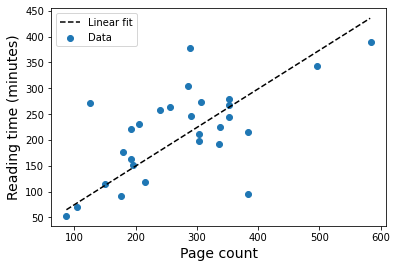

In [9]:
import scipy.optimize as opt

# test linear fit
def func(x, a):
     return a*x

# fitting happens here
params, pcov = opt.curve_fit(func, ebooks['Number of pages'], ebooks['Reading time (if known)'])
x_data = range(ebooks['Number of pages'].min(), ebooks['Number of pages'].max())

# use optimized parameters to plot the best fit
plt.plot(x_data, func(x_data, params[0]), linestyle='dashed', color='k', label="Linear fit")
plt.scatter(ebooks['Number of pages'], ebooks['Reading time (if known)'], label="Data")
plt.xlabel("Page count", size=14)
plt.ylabel("Reading time (minutes)", size=14)
plt.legend()
plt.show()

From this, I can get an estimate of how much time I spent reading books in 2020 based on the proportionality constant from the fit. 

In [10]:
print(f"Approximately {round(params[0],3)} minutes per page")
total_time = books['Number of pages'].sum() * params[0]
print(f"Total: {books['Number of pages'].sum()} pages or {round(total_time,1)} minutes (= {round(total_time/60,2)} hours)")

Approximately 0.747 minutes per page
Total: 20893 pages or 15605.3 minutes (= 260.09 hours)


Perhaps a more interesting number would be how much time that is per day.

In [11]:
print(f"Approximately {round(total_time/365,2)} minutes read per day")

Approximately 42.75 minutes read per day


One last thing I want to check regarding the relationship between reading time and page count is if this varies by year. 

Are older books more difficult for me to parse?

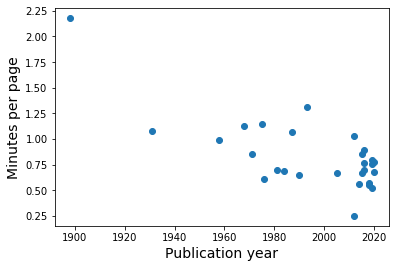

In [12]:
plt.figure()
plt.scatter(ebooks['Year'], ebooks['Reading time (if known)']/ebooks['Number of pages'])
plt.ylabel("Minutes per page", size=14)
plt.xlabel("Publication year", size=14)
plt.show()

I would need more information on books earlier than about 1950 to be really conclusive, but it looks as though that might be the case.

# Separating genres

I sort of kept track genres by way of a column with multiple entries. This is not ideal, it means that I can't easily sort!

I also left a lot of books simply as "fiction" if I wasn't sure what other category would best apply so this is by no means an exhaustive identification. 

This is what I'm working with at the start:

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

inputX = [element.split(';') for element in books['Note']]

transformedX = mlb.fit_transform(inputX)
labels = [element.strip() for element in mlb.classes_]

print(f"{len(labels)} categories as follow:")
labels

19 categories as follow:


['biography',
 'children’s',
 'classics',
 'fairy tales',
 'fantasy',
 'french',
 'german',
 'graphic novel',
 'historical fiction',
 'horror',
 'mystery',
 'novella',
 'romance',
 'science fiction',
 'short story',
 'thriller',
 'young adult',
 'fiction',
 'nonfiction']

I split the labels on their delimiter ";", then use the **MultiLabelBinarizer** to find the unique labels and classify book entries with binary 0/1 for each unique label.

At the end, I make an ordered copy of the label list that removes whitespace to make it tidier. The issue of space characters isn't a problem during classification since the first tag I add for each entry is a fiction/nonfiction identifier, followed by additional notes if I feel like it. This makes the input style at least consistent - first labels have no spaces while all subsequent labels are preceded by a space.

Next, I want to put this information back in a dataframe using the labels and output from MultiLabelBinarizer.

In [14]:
genres = pd.DataFrame(transformedX, columns=labels)
genres.head(5)

,biography,children’s,classics,fairy tales,fantasy,french,german,graphic novel,historical fiction,horror,mystery,novella,romance,science fiction,short story,thriller,young adult,fiction,nonfiction
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


The most general identifier that I always use is fiction vs. nonfiction, let's see what the proportion is.

In [15]:
print(f"Fiction: {genres['fiction'].sum()}")
print(f"Nonfiction: {genres['nonfiction'].sum()}")

Fiction: 60
Nonfiction: 10


I can also see counts by column for all the labels. 

In [16]:
genres.sum()

biography              7
children’s             1
classics               4
fairy tales            2
fantasy                1
french                 1
german                 1
graphic novel          2
historical fiction     7
horror                 2
mystery                4
novella                3
romance               10
science fiction        2
short story            4
thriller               2
young adult           26
fiction               60
nonfiction            10
dtype: int64

The most used labels are "fiction" followed by "young adult" with "nonfiction" and "romance" tied for third. This makes a lot of sense given that I read a lot more novels than nonfiction work. 

As for the "young adult" label, I can attribute that in large part to my love of Diana Wynne Jones. This year, I tried to find as many of her books as I could to read. Her work is aimed primarily at younger audiences (I grew up enjoying her Chrestomanci books among others) but remains entertaining at any age.

To see how skewed this makes the overall tally, see the top author below. Diana Wynne Jones accounts for about a quarter of the books! Some books have more than one author and I prefer not to split that up - the style depends on their coming together and can't always be compared to their solo work.

In [17]:
books['Author'].value_counts().to_frame().head(8)

,Author
Diana Wynne Jones,16
Courtney Milan,4
P. G. Wodehouse,2
George Macdonald,2
Ursula K. Le Guin,2
Jenny Han,2
Henry James,1
Tessa Bailey,1


After the first few authors with repeats, all the rest only appear once.

# Can we predict anything?

With such a small dataset, I want to know if it's possible to predict anything of interest. The author and title categories are pretty specific, and I've already worked on making use of the reading time for the books that have that statistic. 

Maybe there's a link between the year and other book properties.

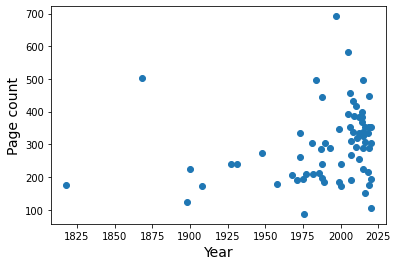

In [18]:
plt.scatter(books['Year'], books['Number of pages'])
plt.xlabel('Year', size=14)
plt.ylabel('Page count', size=14)
plt.show()

It doesn't look promising. 

More quantitatively:

In [19]:
from scipy.stats import pearsonr
pearsonr(books['Year'], books['Number of pages'])

(0.23459714376063856, 0.05060509227431023)

These two variables are not highly correlated.

Having seen the distribution of page count as a function of year, I want to test if taking the genre labels into account will make it possible to more accurately predict the number of pages. I can split the data into X (input) and y (result), keeping only the columns that interest me.

In [20]:
X = pd.concat([books[['Year']], genres], axis=1)
y = books[['Number of pages']]

This part lets me use linear regression on $X=(x_1,...,x_n)$ of the form
\begin{equation*}
y = \sum_{i=1}^n a_i x_i + a_0 
\end{equation*}
to try to find possible correlations by fitting the $a_i$. In this case, the indices 1 through *n* refer to the different column entries for each book. I'm using a model from **sklearn**.

In [21]:
from sklearn import linear_model

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', *regr.intercept_)
print('Coefficients:')
for name, val in zip(X.columns, *regr.coef_):
  print(f'{name:20s} {val:10.3f}')
print('R squared score: \n', regr.score(X, y))

Intercept: 
 -3727.265952114725
Coefficients:
Year                      2.011
biography                 8.773
children’s             -344.341
classics                441.438
fairy tales              69.429
fantasy                 -52.210
french                  -33.041
german                 -129.053
graphic novel          -134.127
historical fiction       63.132
horror                 -270.467
mystery                 108.746
novella                -124.853
romance                 -82.999
science fiction         -19.362
short story             -45.109
thriller                 37.347
young adult              -6.417
fiction                  33.941
nonfiction              -33.941
R squared score: 
 0.45724449167699377


The score is better than I was expecting, but still not particularly good. 
Seeing the coefficients this way helps me to interpret this fit. There's a negative offset which starts all books with a negative page count that is compensated by the term proportional to the year. Then, different labels tend to modify the page count by the coefficient value, i.e. a classic is predicted to be 441 pages longer, but a graphic novel would be 134 pages shorter. 

If I were consistent about all the different genre labels and each book had two or three, it might help. A lot of the labels are used infrequently. I don't strictly need the fiction and nonfiction categories, but it makes sense to see that they end up having exact opposite effects in the fit.

To see if the predicted page counts are anywhere close to reasonable numbers, let's try a couple samples.

In [22]:
print('Fiction:', regr.predict([[1990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]]))
print('Nonfiction:', regr.predict([[1990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]))
print("Children's fiction:", regr.predict([[1990,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]))

Fiction: [[307.86043788]]
Nonfiction: [[239.97870802]]
Children's fiction: [[-104.36196374]]


It comes out to 308 pages for fiction vs. 240 pages for nonfiction for the year 1990. Definitely reasonable. However, if I make that a children's book, it quickly goes awry. 

For fun, I checked to see if withholding some of the data from the fit to use as a test set with would give accurate results. Despite the R squared score in training remaining at the same level around 0.5, the test scores are almost all negative or pretty bad. Here's a printout of some example stats.

In [23]:
from sklearn.model_selection import KFold, cross_validate
kf = KFold(n_splits=5, shuffle=True, random_state=1)

cross_validate(regr, X, y=y, cv=kf.split(X), return_train_score=True, scoring=['r2', 'explained_variance', 'neg_root_mean_squared_error'])

{'fit_time': array([0.00572085, 0.00235224, 0.00227284, 0.00243688, 0.00219822]),
 'score_time': array([0.00521874, 0.00290656, 0.00280476, 0.00275946, 0.00297856]),
 'test_explained_variance': array([-0.27698431,  0.1618899 , -1.71762818, -0.26988971, -1.01753571]),
 'test_neg_root_mean_squared_error': array([-151.78128379, -121.36478374, -133.36677122, -129.63145129,
        -143.93778569]),
 'test_r2': array([-0.27808741,  0.14412052, -2.27043213, -0.41337546, -1.04441759]),
 'train_explained_variance': array([0.42915854, 0.50025275, 0.52661214, 0.54035023, 0.46991954]),
 'train_neg_root_mean_squared_error': array([-80.59581755, -75.96207822, -82.62368463, -76.90497757,
        -83.89799387]),
 'train_r2': array([0.42915854, 0.50025275, 0.52661214, 0.54035023, 0.46991954])}

The RMS error on the test predictions is about 130 pages off, compared to about 80 pages off in training. In any case, this has been a fun exercise! It would be interesting to try something similar with a larger, more complete dataset not influenced by my taste in books.

# Goals for next year

In keeping with my usual resolution to read as much as I can, I would like to challenge myself to aim for breadth, by reading more diverse authors and continuing to enjoy books from different time periods. 

I didn't read a lot of nonfiction this year, but what I did read I enjoyed. Biographies, funny autobiographies in particular are really interesting and I think I should give more of them a try. 

I also want to read more books in French. I haven't had nearly as much occasion to practice my French lately, and I think this would be a good way to keep vocabulary active. I should look for easy German books too.